In [1]:
import pandas as pd
copper=pd.read_excel(r"C:\Users\Akshaya\Downloads\Copper_Set.xlsx")
copper.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [2]:
copperbefcln=pd.read_excel(r"C:\Users\Akshaya\Downloads\Copper_Set.xlsx")
copperbefcln.shape

(181673, 14)

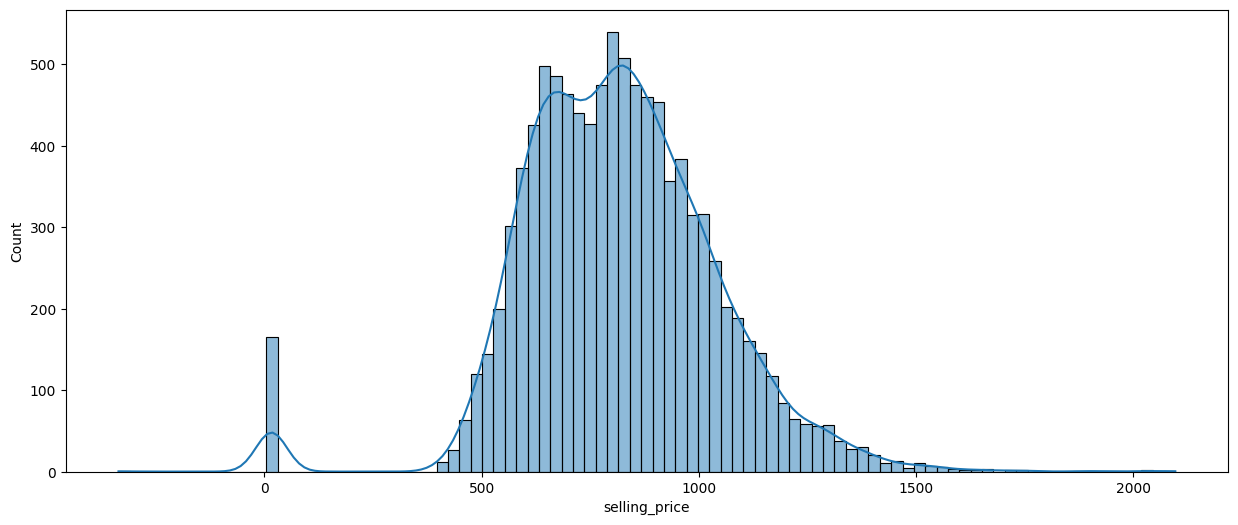

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox

plt.figure(figsize=(15, 6))
skewdat=copperbefcln.sample(10000, random_state=42)
sns.histplot(skewdat['selling_price'], kde=True)
plt.show()

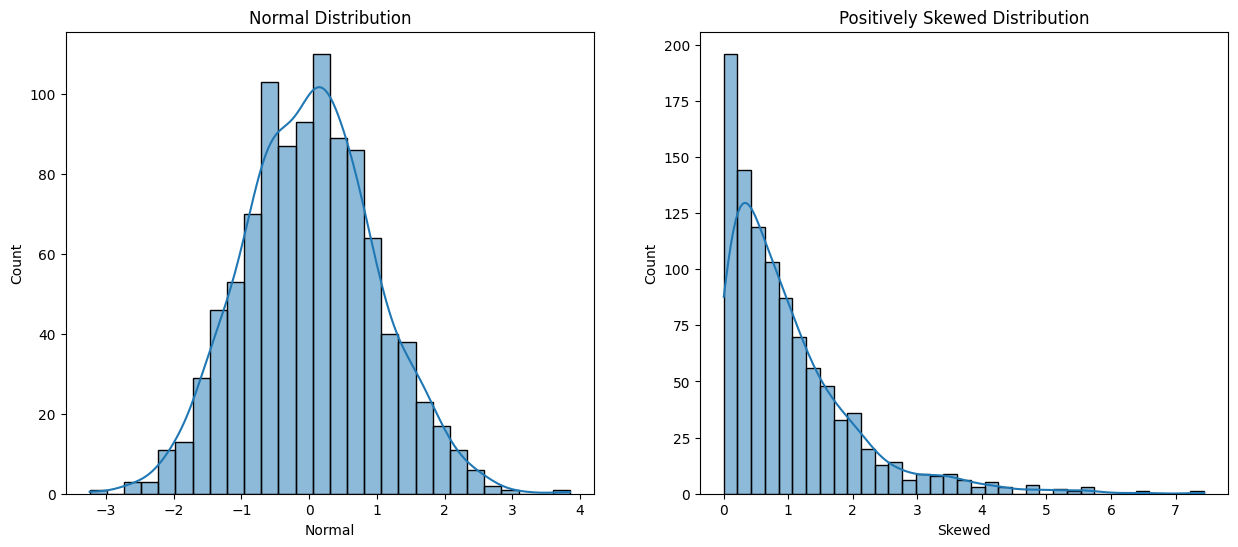

Skewness of Normal Distribution: 0.11697636882001397
Skewness of Positively Skewed Distribution: 1.983788869861754


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame with skewed data
np.random.seed(42)
data = {
    'Normal': np.random.normal(0, 1, 1000),  # Normally distributed
    'Skewed': np.random.exponential(1, 1000)  # Exponentially distributed (positively skewed)
}

df = pd.DataFrame(data)

# Plot histograms and density plots to visualize skewness
plt.figure(figsize=(15, 6))

# Normal distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Normal'], kde=True)
plt.title('Normal Distribution')

# Skewed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Skewed'], kde=True)
plt.title('Positively Skewed Distribution')

plt.show()

# Calculate and print skewness
skewness_normal = df['Normal'].skew()
skewness_skewed = df['Skewed'].skew()

print(f'Skewness of Normal Distribution: {skewness_normal}')
print(f'Skewness of Positively Skewed Distribution: {skewness_skewed}')

In [5]:
df

,Normal,Skewed
0,0.496714,0.183301
1,-0.138264,0.110449
2,0.647689,1.011784
3,1.523030,1.225795
4,-0.234153,0.032096
...,...,...
995,-0.281100,0.329453
996,1.797687,0.231923
997,0.640843,0.726854
998,-0.571179,0.005521


In [6]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y%m%d', errors='coerce').dt.date
copper['quantity tons'] = pd.to_numeric(copper['quantity tons'], errors='coerce')
copper['customer'] = pd.to_numeric(copper['customer'], errors='coerce')
copper['country'] = pd.to_numeric(copper['country'], errors='coerce')
copper['application'] = pd.to_numeric(copper['application'], errors='coerce')
copper['thickness'] = pd.to_numeric(copper['thickness'], errors='coerce')
copper['width'] = pd.to_numeric(copper['width'], errors='coerce')
copper['material_ref'] = copper['material_ref'].str.lstrip('0')
copper['product_ref'] = pd.to_numeric(copper['product_ref'], errors='coerce')
copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y%m%d', errors='coerce').dt.date
copper['selling_price'] = pd.to_numeric(copper['selling_price'], errors='coerce')

In [8]:
idnull=copper['id'].isnull()
print(idnull.any())
copper[idnull].sort_index()

True


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
26,NaN,2021-04-01,15.927990,30271717.0,28.0,To be approved,W,10.0,0.8,1000.0,NaN,611993,2021-07-01,1208.0
104566,NaN,2020-11-13,27.096376,30197989.0,27.0,Won,W,59.0,2.8,959.0,HRCL_DD 12 2.8X959,640665,2020-12-01,551.0


In [9]:
print(len(copper))
copper=copper.dropna(subset='id')
print(len(copper))

181673
181671


In [10]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181671 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181668 non-null  object 
 2   quantity tons  181670 non-null  float64
 3   customer       181670 non-null  float64
 4   country        181643 non-null  float64
 5   status         181669 non-null  object 
 6   item type      181671 non-null  object 
 7   application    181647 non-null  float64
 8   thickness      181670 non-null  float64
 9   width          181671 non-null  float64
 10  material_ref   103753 non-null  object 
 11  product_ref    181671 non-null  int64  
 12  delivery date  181668 non-null  object 
 13  selling_price  181670 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [11]:
datnull=copper['item_date'].isnull()
print(datnull.any())
copper[datnull].sort_index()

True


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
52,175B56C3-CDF1-4BD4-BC83-C1BF1FEAD8B8,NaT,27.743221,30162161.0,77.0,Won,S,4.0,1.1,1300.0,DX51D+Z100 MA,164141591,2021-06-01,1046.0
104640,1BA92915-36FC-437A-811C-9DC7BF958EA6,NaT,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,2021-01-01,654.0
105485,40203729-1A96-481E-9B71-3FF672C27F0B,NaT,101.742899,30210087.0,26.0,Lost,S,42.0,3.0,1494.0,NaN,1668701718,2021-02-01,795.0


In [12]:
print(len(copper))
copper=copper.dropna(subset='item_date')
print(len(copper))

181671
181668


In [13]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181668 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181668 non-null  object 
 1   item_date      181668 non-null  object 
 2   quantity tons  181667 non-null  float64
 3   customer       181667 non-null  float64
 4   country        181640 non-null  float64
 5   status         181666 non-null  object 
 6   item type      181668 non-null  object 
 7   application    181644 non-null  float64
 8   thickness      181667 non-null  float64
 9   width          181668 non-null  float64
 10  material_ref   103752 non-null  object 
 11  product_ref    181668 non-null  int64  
 12  delivery date  181665 non-null  object 
 13  selling_price  181667 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [14]:
cusnull=copper['customer'].isnull()
print(cusnull.any())
copper[cusnull].sort_index()

True


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104684,6E764168-3F32-4E5D-BD67-4B1D959C75E3,2020-11-12,205.266351,NaN,39.0,Won,W,10.0,3.5,1270.0,NaN,1670798778,2021-02-01,650.0


In [15]:
print(len(copper))
copper=copper.dropna(subset='customer')
print(len(copper))

181668


181667


In [16]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181667 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181667 non-null  object 
 1   item_date      181667 non-null  object 
 2   quantity tons  181666 non-null  float64
 3   customer       181667 non-null  float64
 4   country        181639 non-null  float64
 5   status         181665 non-null  object 
 6   item type      181667 non-null  object 
 7   application    181643 non-null  float64
 8   thickness      181666 non-null  float64
 9   width          181667 non-null  float64
 10  material_ref   103752 non-null  object 
 11  product_ref    181667 non-null  int64  
 12  delivery date  181664 non-null  object 
 13  selling_price  181666 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [17]:
connull=copper['country'].isna()
print(connull.any())
copper[connull].sort_index()

True


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104936,DA084B55-6789-4CC4-9F4F-361EE7C2614C,2020-11-12,127.243871,3.019689e+07,NaN,Not lost for AM,S,10.0,3.50,1220.0,NaN,1668701718,2021-02-01,810.0
104959,EA5FCEBF-D8D8-43D3-9CFB-9134634764CE,2020-11-12,108.751059,3.019927e+07,NaN,Lost,S,10.0,3.50,1220.0,NaN,164141591,2021-04-01,847.0
105007,4433B483-7929-4DE7-B467-6263B3C02DDF,2020-11-12,30.156899,3.034185e+07,NaN,Not lost for AM,S,41.0,0.60,1250.0,NaN,611993,2021-02-01,1099.0
105055,B689A281-5701-4D9A-B6C3-25BEA51B1656,2020-11-12,52.086808,3.019859e+07,NaN,Not lost for AM,S,59.0,3.65,1409.0,MP0365PRSCJR1409,640665,2021-01-01,575.0
108971,AE2513DD-4289-4B80-9F5A-C05F5FE14FA0,2020-11-05,34.200136,2.147484e+09,NaN,To be approved,S,NaN,5.00,1500.0,NaN,640405,2021-01-01,630.0
108973,A42A4216-082E-447E-9DA8-8FA43AAFDBE2,2020-11-05,33.491866,2.147484e+09,NaN,Draft,S,NaN,6.00,1500.0,NaN,640405,2021-01-01,19.0
108975,6CC87C58-D6BB-45F1-A2C2-637DA1E0E4A5,2020-11-05,29.133722,2.147484e+09,NaN,Draft,S,NaN,8.00,1500.0,NaN,640405,2021-01-01,12.0
108977,12EDD093-C1E3-4224-A367-AF9BC982519B,2020-11-05,33.533078,2.147484e+09,NaN,Draft,S,NaN,9.99,1500.0,NaN,640405,2021-01-01,21.0
108979,48CC05C8-17E7-49E1-ADD9-5B88CF8E6E5F,2020-11-05,25.518348,2.147484e+09,NaN,Draft,S,NaN,11.99,1500.0,NaN,640405,2021-01-01,21.0
108981,1D41F861-31AC-4177-97A3-F1AE6641A0F7,2020-11-05,27.274928,2.147484e+09,NaN,Draft,S,NaN,14.99,1500.0,NaN,640405,2021-01-01,20.0


In [18]:
print(len(copper))
copper=copper.dropna(subset='country')
print(len(copper))

181667
181639


In [19]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181639 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181639 non-null  object 
 1   item_date      181639 non-null  object 
 2   quantity tons  181638 non-null  float64
 3   customer       181639 non-null  float64
 4   country        181639 non-null  float64
 5   status         181637 non-null  object 
 6   item type      181639 non-null  object 
 7   application    181639 non-null  float64
 8   thickness      181638 non-null  float64
 9   width          181639 non-null  float64
 10  material_ref   103751 non-null  object 
 11  product_ref    181639 non-null  int64  
 12  delivery date  181636 non-null  object 
 13  selling_price  181638 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [20]:
statnull=copper['status'].isna()
print(statnull.any())
copper[statnull].sort_index()

True


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
105662,A5FBB960-C2BF-4956-8B4A-CD60495541D3,2020-11-11,101.342459,30287258.0,27.0,NaN,S,10.0,0.68,940.0,750928009B2F60HEA,611993,2021-01-01,862.0
105749,F6E1BBAE-B27F-42B5-87C8-EE36415C18A6,2020-11-11,50.532524,30287258.0,27.0,NaN,S,10.0,0.58,908.0,405029489B2F60HEA,611993,2021-01-01,899.0


In [21]:
print(len(copper))
copper=copper.dropna(subset='status')
print(len(copper))

181639


181637


In [22]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181637 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181637 non-null  object 
 1   item_date      181637 non-null  object 
 2   quantity tons  181636 non-null  float64
 3   customer       181637 non-null  float64
 4   country        181637 non-null  float64
 5   status         181637 non-null  object 
 6   item type      181637 non-null  object 
 7   application    181637 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181637 non-null  float64
 10  material_ref   103749 non-null  object 
 11  product_ref    181637 non-null  int64  
 12  delivery date  181634 non-null  object 
 13  selling_price  181636 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [23]:
matref=copper['material_ref'].isnull()
print(matref.any())
copper[matref].sort_index

True


<bound method DataFrame.sort_index of                                           id   item_date  quantity tons  \
12      EE7EE006-15B3-47A5-A48D-70D54C6B734C  2021-04-01      27.512545   
14      99659229-166B-4966-AA1F-9796DA6055DB  2021-04-01      10.411350   
18      9CEF626C-6124-4C5C-9D54-0E5B8A8F2782  2021-04-01      16.253987   
22      93B04F7B-0A4C-4D45-AB3A-67DB7888869A  2021-04-01      14.203574   
30      D8ABD8F4-7A72-446E-8C91-4C9FBF240EF3  2021-04-01       9.822404   
...                                      ...         ...            ...   
181652  F5EC467C-300D-4E85-BEF7-51999E0B7CA7  2020-07-02       1.672379   
181653  497F5391-F450-4B49-870D-9B62A0274DD6  2020-07-02      50.646907   
181654  04701946-E052-44C9-BCB5-C6AFC2EBFF7E  2020-07-02       3.769829   
181655  D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A  2020-07-02     220.875272   
181656  A020C0C8-B478-4EC0-9769-9FA2618E33DE  2020-07-02       9.754097   

          customer  country          status item type  applic

In [24]:
copper['material_ref'] = copper['material_ref'].apply(lambda x: 'Others' if str(x).count('0') >= 5 else x)

In [25]:
copper['material_ref']=copper['material_ref'].fillna('Others')

In [26]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181637 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181637 non-null  object 
 1   item_date      181637 non-null  object 
 2   quantity tons  181636 non-null  float64
 3   customer       181637 non-null  float64
 4   country        181637 non-null  float64
 5   status         181637 non-null  object 
 6   item type      181637 non-null  object 
 7   application    181637 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181637 non-null  float64
 10  material_ref   181637 non-null  object 
 11  product_ref    181637 non-null  int64  
 12  delivery date  181634 non-null  object 
 13  selling_price  181636 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [27]:
delna=copper['delivery date'].isnull()
copper[delna].sort_index()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
58,9600E05B-D1F9-4E71-B525-60D64129E8AE,2021-04-01,13.634770,30271717.0,28.0,To be approved,W,10.0,0.6,1250.0,Others,611993,NaT,1266.0
104761,B9C4BAAE-25C3-468F-B315-63D57FA31C15,2020-11-12,100.229137,30349338.0,26.0,Won,S,10.0,1.0,1300.0,Others,611993,NaT,1005.0
105421,4536FA48-F914-45EE-8275-261B07C24E8F,2020-11-12,30.714021,30350566.0,28.0,Won,S,70.0,0.6,1250.0,Others,611993,NaT,825.0


In [28]:
print(len(copper))
copper=copper.dropna(subset='delivery date')
print(len(copper))

181637
181634


In [29]:
selna=copper['selling_price'].isnull()
copper[selna].sort_index()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104846,78C43232-2EB9-4AD7-899E-0E0BE14B2AE8,2020-11-12,25.814926,30349625.0,80.0,Lost,S,15.0,1.2,1250.0,Others,628377,2021-01-01,NaN


In [30]:
print(len(copper))
copper=copper.dropna(subset='selling_price')
print(len(copper))

181634
181633


In [31]:
import numpy as np
copper.loc[copper['selling_price'] <= 0, 'selling_price'] = np.nan
copper.loc[copper['quantity tons'] <= 0, 'quantity tons'] = np.nan
copper.loc[copper['thickness'] <= 0, 'thickness'] = np.nan
copper.loc[copper['width']<=0, 'width']=np.nan

In [32]:
copper=copper.dropna()

In [33]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   181620 non-null  object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  object 
 13  selling_price  181620 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [34]:
duid=copper['id'].duplicated()
copper[duid].sort_index()


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price


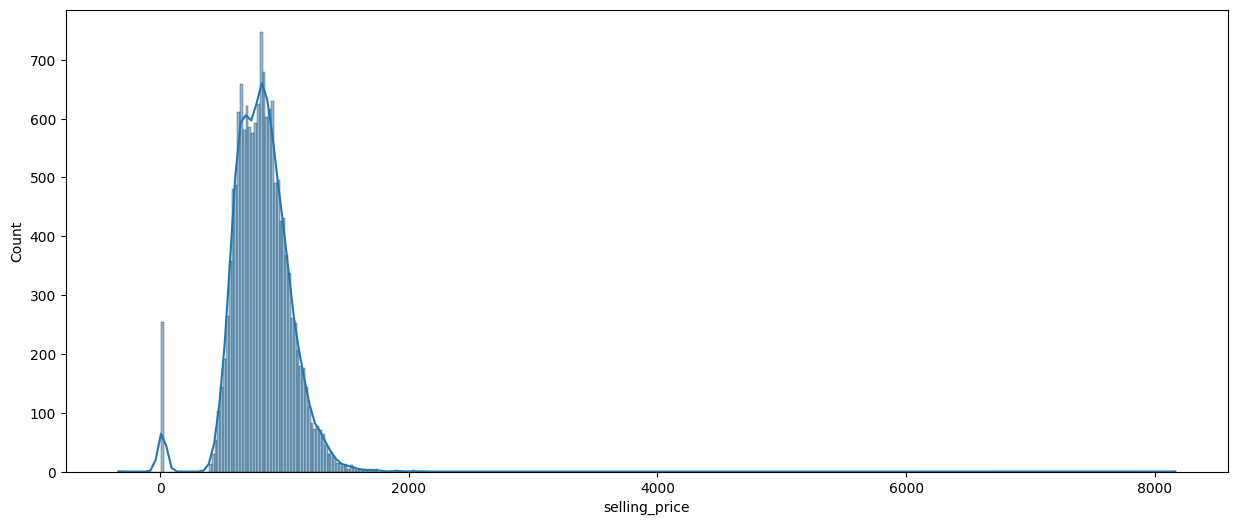

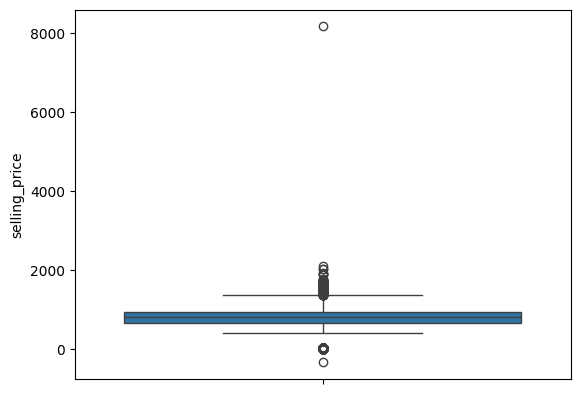

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
plt.figure(figsize=(15, 6))
skewdat=copperbefcln.sample(15000, random_state=42)
sns.histplot(skewdat['selling_price'], kde=True)
plt.show()
sns.boxplot(skewdat['selling_price'])

plt.show()

In [36]:
xi=copper['selling_price'].apply(lambda x: x >=1400)
print(len(copper))
len(copper[xi])

181620


1426

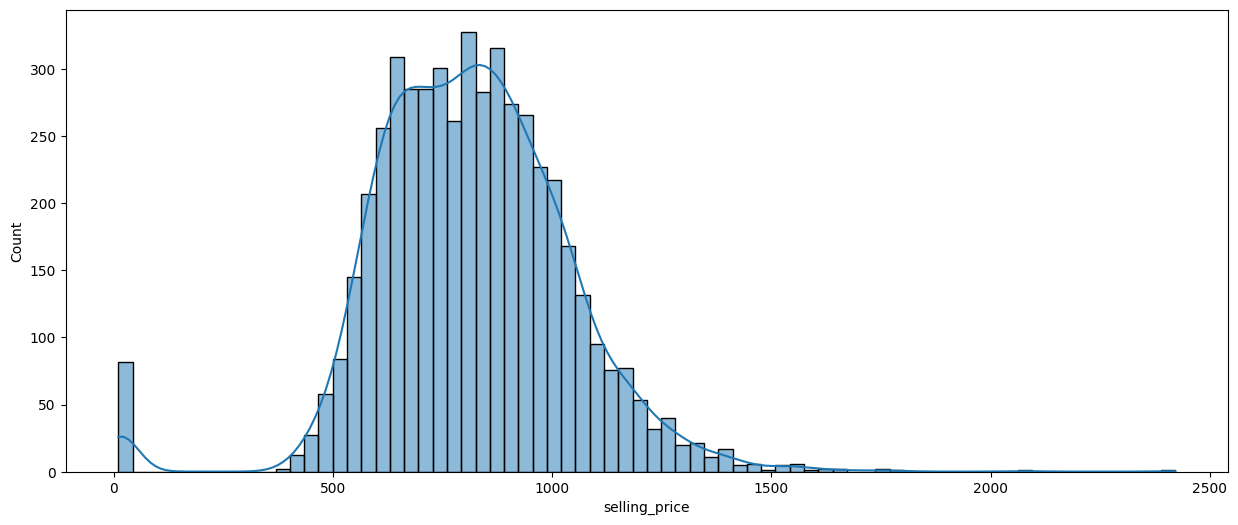

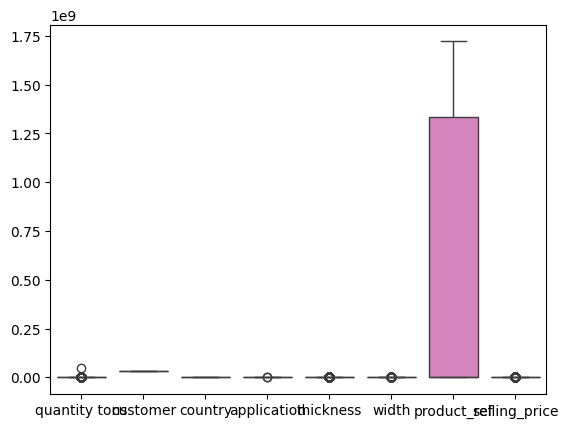

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
plt.figure(figsize=(15, 6))
skewdat=copper.sample(5000, random_state=42)
sns.histplot(skewdat['selling_price'], kde=True)
plt.show()
sns.boxplot(skewdat)

plt.show()

 1   item_date      150439 non-null  float64
 2   quantity tons  150439 non-null  object 
 3   customer       150439 non-null  float64
 4   country        150439 non-null  float64
 5   status         150439 non-null  object 
 6   item type      150439 non-null  object 
 7   application    150439 non-null  float64
 8   thickness      150439 non-null  float64
 9   width          150439 non-null  float64
 10  material_ref   150439 non-null  object 
 11  product_ref    150439 non-null  float64
 12  delivery date  150439 non-null  float64
 13  selling_price  150439 non-null  float64

In [38]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   181620 non-null  object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  object 
 13  selling_price  181620 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [39]:
print(len(copper))
copper = copper[copper['quantity tons'] != 'e']
len(copper)

181620


181620

In [69]:
copper['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [40]:
print(x)

NameError: name 'x' is not defined

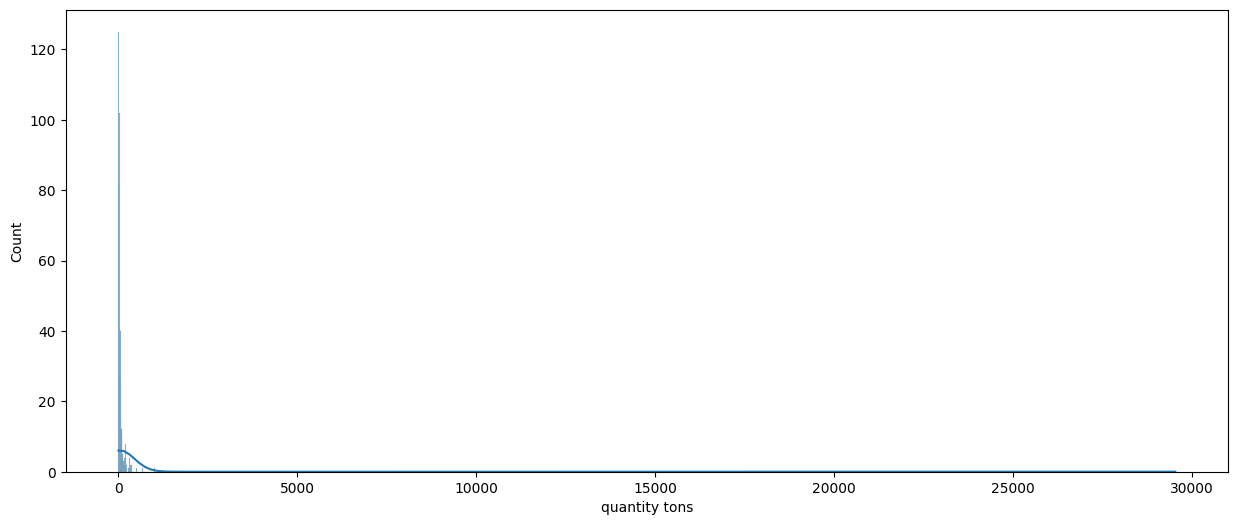

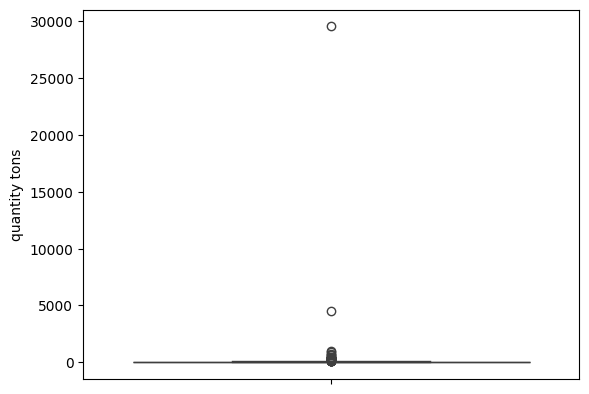

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(500, random_state=42)
sns.histplot(skewdat['quantity tons'], kde=True)
plt.show()
sns.boxplot(skewdat['quantity tons'])

plt.show()

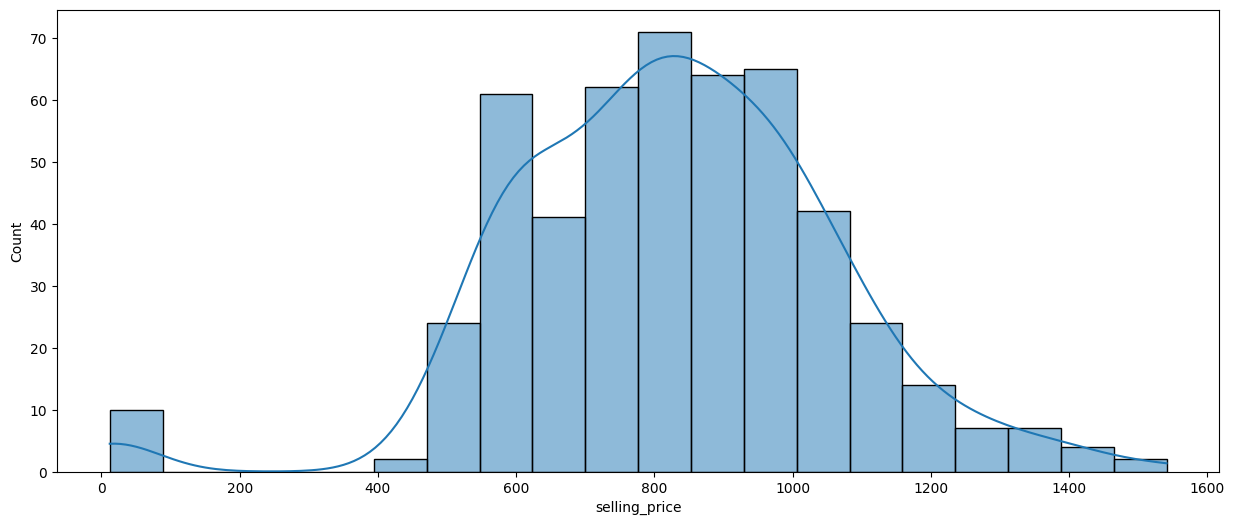

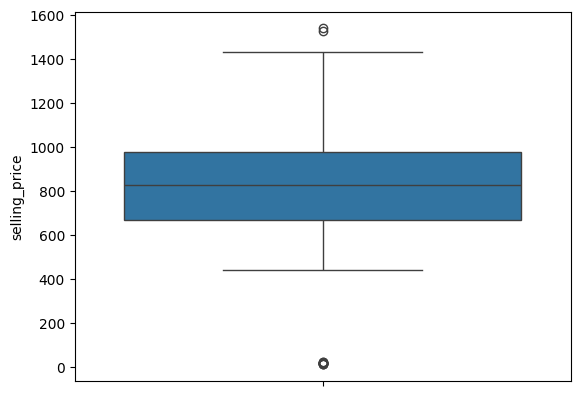

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(500, random_state=42)
sns.histplot(skewdat['selling_price'], kde=True)
plt.show()
sns.boxplot(skewdat['selling_price'])

plt.show()

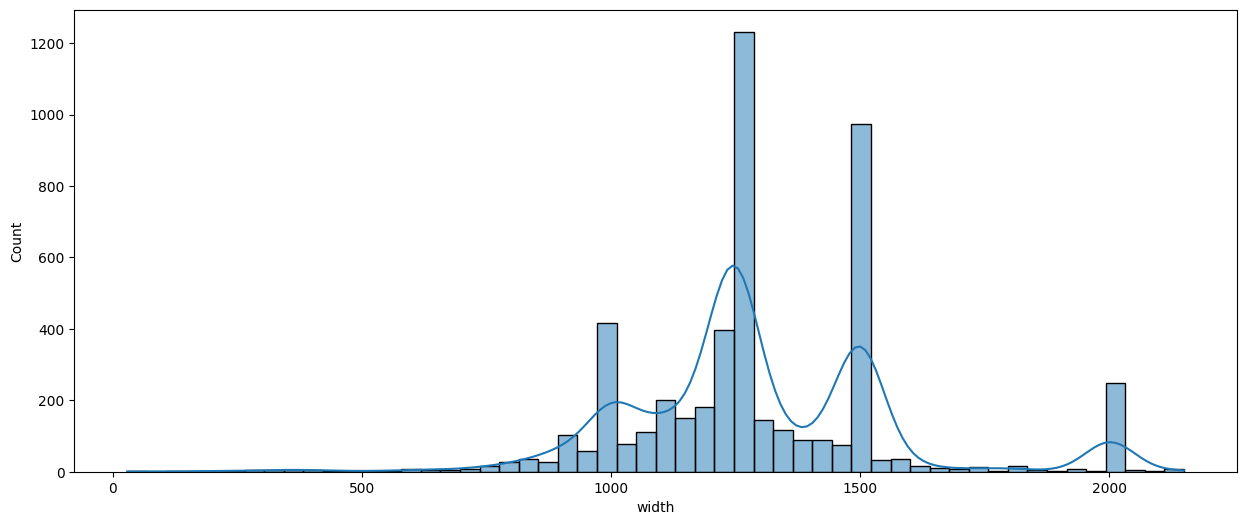

<Axes: ylabel='width'>

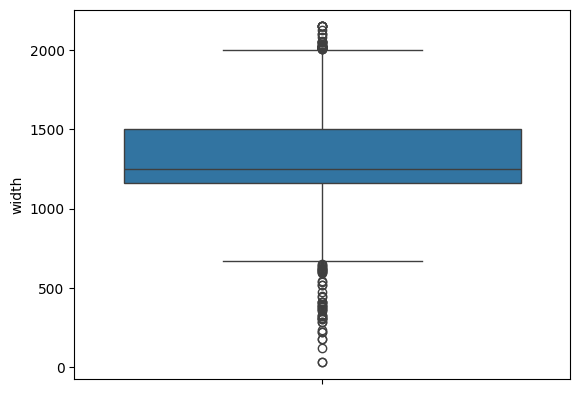

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(5000, random_state=42)
sns.histplot(skewdat['width'], kde=True)
plt.show()
sns.boxplot(skewdat['width'])

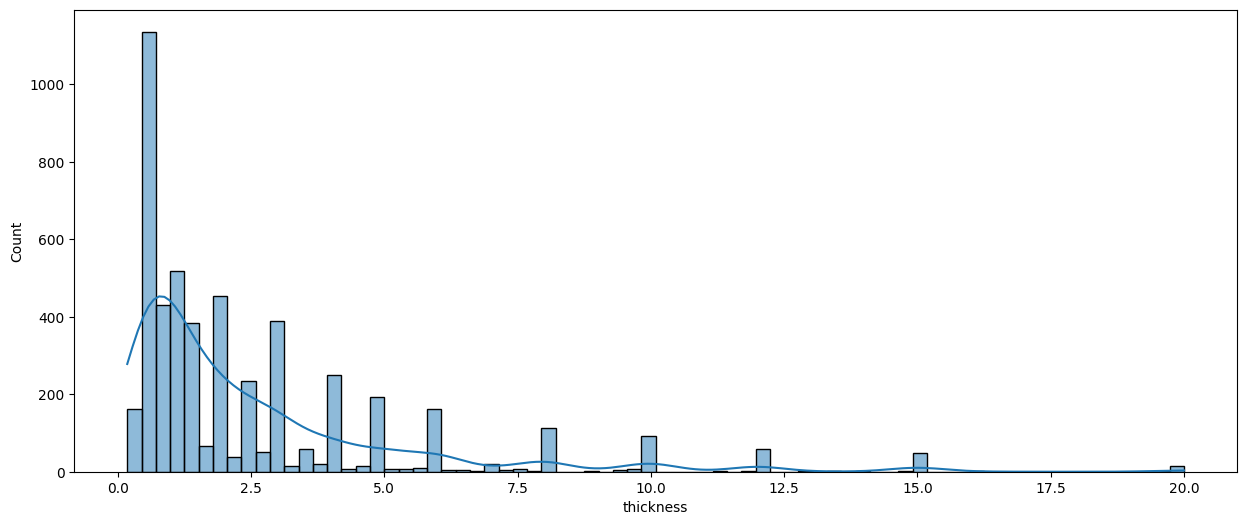

<Axes: ylabel='thickness'>

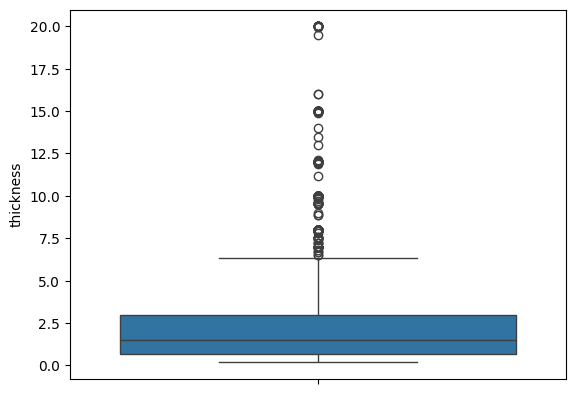

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(5000, random_state=42)
sns.histplot(skewdat['thickness'], kde=True)
plt.show()
sns.boxplot(skewdat['thickness'])

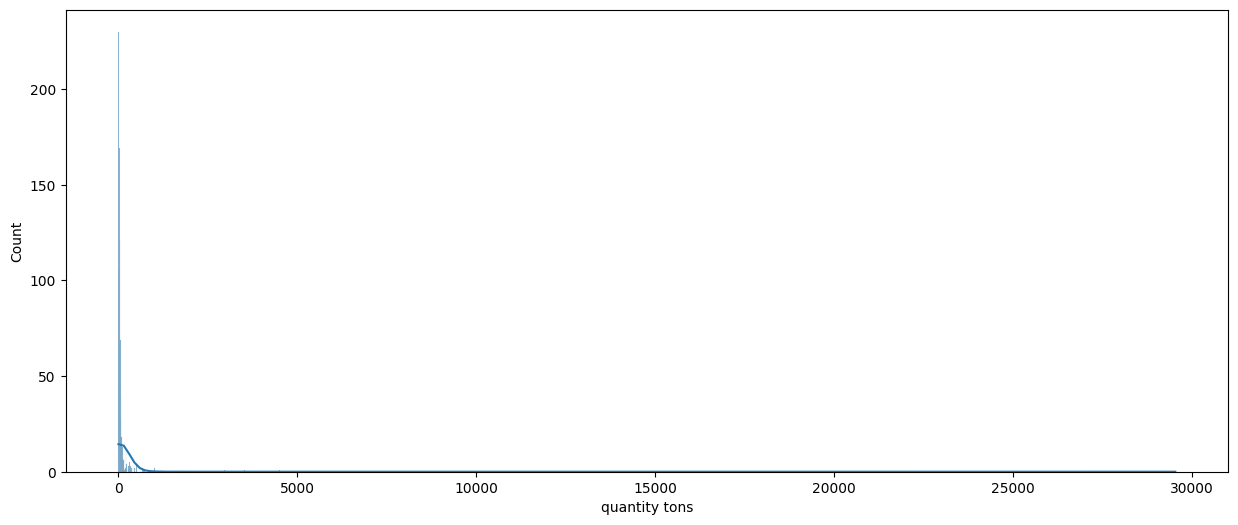

<Axes: ylabel='quantity tons'>

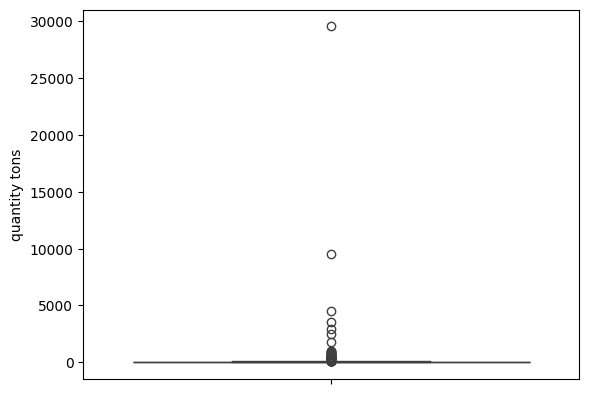

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(1000, random_state=42)
sns.histplot(skewdat['quantity tons'], kde=True)
plt.show()
sns.boxplot(skewdat['quantity tons'])

In [ ]:
# Q1 = copper[['quantity tons','selling_price','thickness']].quantile(0.25)
# Q3 = copper[['quantity tons','selling_price','thickness']].quantile(0.75)
# IQR = Q3 - Q1
# IQR
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# copper['anomaly'] = 1


# copper_transformed = copper.copy()

# for feature in ['quantity tons','selling_price','thickness']:
#     copper[feature] = copper[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])


In [ ]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   181620 non-null  object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  object 
 13  selling_price  181620 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [ ]:
copper.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [ ]:
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import RobustScaler
# # iso_forest = IsolationForest(contamination=0.05, random_state=42)
# # copper['anomaly'] = iso_forest.fit_predict(copper[['width', 'selling_price','thickness']])
# threshold_values = {'width': {'lower':500,'upper':2000}, 'selling_price': 1400, 'thickness': 5} # Define your threshold value here
# copper['anomaly'] = 1
# for feature, threshold in threshold_values.items():
#     if isinstance(threshold, dict):  # Check if the threshold is a dict (range case)
#         lower = threshold['lower']
#         upper = threshold['upper']
#         copper['anomaly'] = np.where(
#             (copper[feature] < lower) | (copper[feature] > upper) | (['anomaly'] == -1), 
#             -1, 
#             copper['anomaly']
#         )
#     else:  # Single upper threshold case
#         copper['anomaly'] = np.where(
#             (copper[feature] > threshold) | (copper['anomaly'] == -1), 
#             -1, 
#             copper['anomaly']
#         )
# # Calculate IQR
# Q1 = copper.quantile(0.25)
# Q3 = copper.quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers based on the threshold value
# copper['anomaly'] = np.where(copper > threshold_values, -1, 1)

# # Filter outliers and non-outliers
# outliers = copper[copper['anomaly'] == -1]
# non_outliers = copper[copper['anomaly'] == 1]

# scaler = RobustScaler()
# copper[['width', 'selling_price','thickness']] = scaler.fit_transform(copper[['width', 'selling_price','thickness']])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

# Sample data
data = {
    'feature1': [10, 12, 12, 13, 12, 11, 14, 10, 100, 12, 11, 12, 13, 12],
    'feature2': [1, 2, 2, 3, 2, 1, 4, 1, 0, 2, 1, 2, 3, 2]
}
df = pd.DataFrame(data)

# IQR Method
def treat_outliers_iqr(df):
    treated_df = df.copy()
    for col in treated_df.columns:
        Q1 = treated_df[col].quantile(0.25)
        Q3 = treated_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        treated_df = treated_df[(treated_df[col] >= lower_bound) & (treated_df[col] <= upper_bound)]
    return treated_df

df_iqr_treated = treat_outliers_iqr(df)

# Isolation Forest Method
def treat_outliers_isolation_forest(df):
    iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination based on the dataset
    preds = iso_forest.fit_predict(df)
    mask = preds != -1
    treated_df = df[mask]
    return treated_df

df_isolation_forest_treated = treat_outliers_isolation_forest(df)

print("Original Data:")
print(df)
print("\nData after IQR treatment:")
print(df_iqr_treated)
print("\nData after Isolation Forest treatment:")
print(df_isolation_forest_treated)


Original Data:
    feature1  feature2
0         10         1
1         12         2
2         12         2
3         13         3
4         12         2
5         11         1
6         14         4
7         10         1
8        100         0
9         12         2
10        11         1
11        12         2
12        13         3
13        12         2

Data after IQR treatment:
    feature1  feature2
0         10         1
1         12         2
2         12         2
3         13         3
4         12         2
5         11         1
7         10         1
9         12         2
10        11         1
11        12         2
12        13         3
13        12         2

Data after Isolation Forest treatment:
    feature1  feature2
0         10         1
1         12         2
2         12         2
3         13         3
4         12         2
5         11         1
7         10         1
9         12         2
10        11         1
11        12         2
12        13         

In [ ]:
from scipy.stats import skew
import numpy as np

numeric_cols = copper.select_dtypes(include=[np.number]).columns
skewness = copper[numeric_cols].apply(lambda x: skew(x.dropna()))

# Define a threshold for skewness
threshold = 0.75
skewed_features = skewness[abs(skewness) > threshold].index

for feature in skewed_features:
    # To handle non-positive values, shift the data if necessary
    min_value = copper[feature].min()
    if min_value <= 0:
        copper[feature] = np.log(copper[feature] - min_value + 1)
    else:
        copper[feature] = np.log(copper[feature])

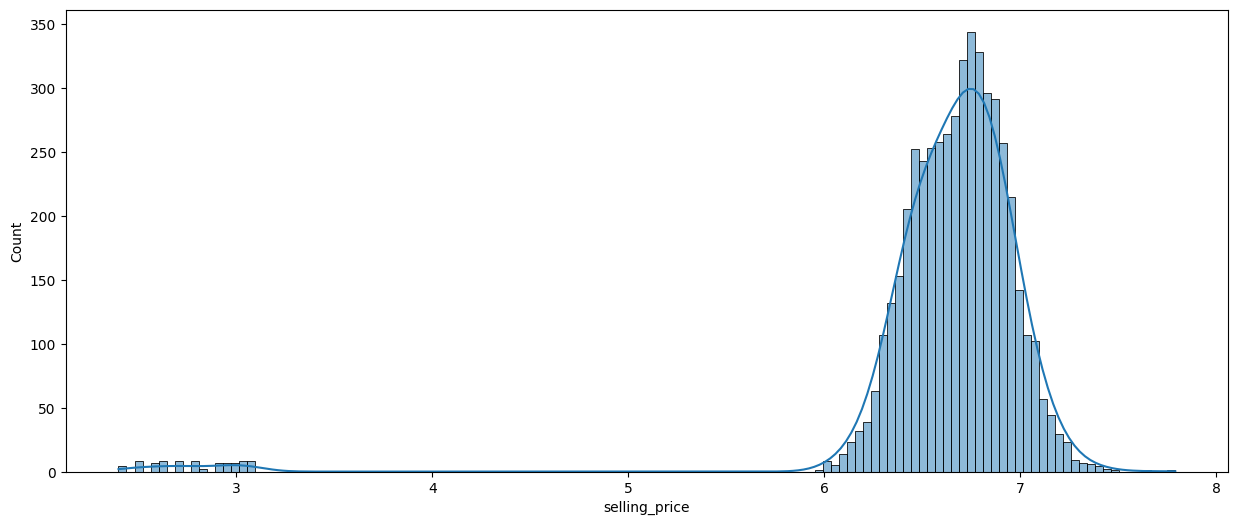

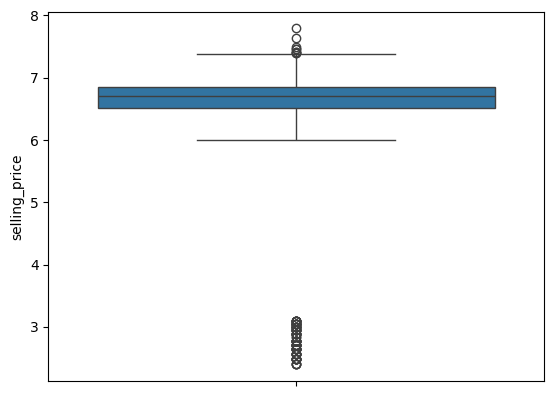

In [ ]:
plt.figure(figsize=(15, 6))
skewdat=copper.sample(5000, random_state=42)
sns.histplot(skewdat['selling_price'], kde=True)
plt.show()
sns.boxplot(skewdat['selling_price'])

plt.show()

In [ ]:
import numpy as np
copper['selling_price_log'] = np.log(copper['selling_price'])
# sns.distplot(df_p['selling_price_log'])
# plt.show()

copper['quantity tons_log'] = np.log(copper['quantity tons'])
# sns.distplot(df_p['quantity tons_log'])
# plt.show()

copper['thickness_log'] = np.log(copper['thickness'])
# sns.distplot(df_p['thickness_log'])
# plt.show()

c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

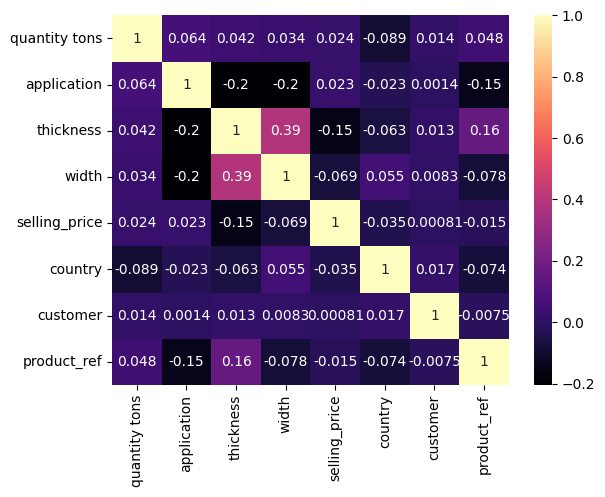

In [ ]:
x=copper[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="magma")

In [ ]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             181620 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  float64
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181619 non-null  float64
 15  quantity tons_log  179170 non-null  float64
 16  thickne

In [ ]:
copper.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,17.221905,3.332205,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,21.236568,2021-07-01,6.749931,1.909532,1.384237,-0.366513
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,17.223450,3.218876,Won,W,41.0,-0.223144,1210.0,104991,21.235312,2021-04-01,6.953684,1.939272,1.893687,NaN
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,17.221827,3.401197,Won,WI,28.0,-0.967584,952.0,S0380700,13.350896,2021-01-01,6.468211,1.866900,1.784427,NaN
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,17.228293,3.465736,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,21.235312,2021-01-01,6.643790,1.893683,1.669648,-0.182831
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,17.223735,3.332205,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,13.370262,2021-03-01,6.357842,1.849689,1.897073,0.326634


In [ ]:
# from sklearn import preprocessing
# label_encoders = {}
# cols = ['material_ref', 'item type','status']
# # Encode labels of multiple columns at once



# label_encoders = {}

# # Encode labels of multiple columns and store the encoders
# for col in cols:
#     le = preprocessing.LabelEncoder()
#     copper[col] = le.fit_transform(copper[col])
#     label_encoders[col] = le

# # Print head
# copper.head()

In [ ]:
copper['customer'].unique()

array([17.22190468, 17.22344976, 17.22182692, ..., 17.23006948,
       17.22615299, 17.22207879])

In [ ]:
sta=copper['status'].value_counts()
it=copper['item type'].value_counts()
app=copper['item type'].value_counts()
con=copper['country'].value_counts()
pro=copper['product_ref'].value_counts()
mat=copper['material_ref'].value_counts()
print(sta)
print(it)
print(app)
print(con)
print(pro)
print(mat)

status
Won                115996
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4167
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
item type
W         105599
S          69200
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
item type
W         105599
S          69200
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
country
4.356709    32082
3.258097    27513
3.218876    23357
3.295837    21505
3.465736    18657
3.332205    15821
4.430817    12776
4.343805     9713
3.401197     8701
3.663562     3730
4.369448     2742
3.637586     1712
3.688879     1683
4.382027      817
4.727388      714
4.488636       92
4.672829        5
Name: count, dtype: int64
product_ref
13.324476    45718
18.916240    28778
13.370262    27372
21.236568    1

In [ ]:
# x=copper[['country','quantity tons','thickness','width','application','item type','material_ref','status','product_ref','customer']].values
# #x=copper[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values
# y1=copper['selling_price'].values
# y2=copper['status'].values
from sklearn.preprocessing import  OneHotEncoder
X=copper[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
y=copper['selling_price']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             181620 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  float64
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181619 non-null  float64
 15  quantity tons_log  179170 non-null  float64
 16  thickne

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
   ('std_scalar', StandardScaler())
])


X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

In [ ]:
#random forest reg
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
model1=RandomForestRegressor(n_estimators=100, random_state=42,max_depth=20, min_samples_leaf=2,min_samples_split=10).fit(X_train,y_train)
y_pred=model1.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)


Mean Absolute Error: 0.19875107697356684
Mean Squared Error: 0.06252614629031582
Root Mean Squared Error: 0.2500522871127473
R² score: 0.8035865311072845


In [ ]:
# import pickle
# with open("Regressionmodel.pkl","wb") as files:
#     pickle.dump(model1, files)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=20, min_samples_leaf=2,min_samples_split=10,max_features='sqrt')
dt_regressor.fit(X_train, y_train)
y_pred=dt_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

Mean Absolute Error: 0.20506074661824328
Mean Squared Error: 0.0736545316032443
Root Mean Squared Error: 0.2713936837939385
R² score: 0.7686289190974497


In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

Mean Absolute Error: 524728212.3210688
Mean Squared Error: 3.041845732904905e+18
Root Mean Squared Error: 1744088797.3107634
R² score: -9.555354162757554e+18


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=copper[['quantity tons','application','thickness','width','country','customer','product_ref','status','item type']]
y=copper['selling_price']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [10, 20,35,5],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.031363525329837424
R-squared: 0.9026494505513954


In [ ]:
def preprocess_new_sample(sample, ohe, ohe2, scaler):
    sample_df = pd.DataFrame([sample])
    # Encode the categorical features
    sample_ohe = ohe.transform(sample_df[['item type']]).toarray()
    sample_be = ohe2.transform(sample_df[['status']]).toarray()
    sample_encoded = np.concatenate((sample_df[['quantity tons', 'application', 'thickness', 'width', 'country', 'customer', 'product_ref']].values, sample_ohe, sample_be), axis=1)
    # Scale the features
    sample_scaled = scaler.transform(sample_encoded)
    return sample_scaled

# Example of a new sample input
new_sample = {
    'quantity tons': np.log(54.15),
    'application': 41,
    'thickness': np.log(2),
    'width': 1500,
    'country': 28,
    'customer': 30156308,
    'product_ref': 1670798778,
    'status': 'Won',
    'item type': 'W'
}

# Preprocess the new sample
preprocessed_sample = preprocess_new_sample(new_sample, ohe, ohe2, scaler)

# Predict the selling price for the new sample
new_prediction = best_model.predict(preprocessed_sample)
ans=np.exp(new_prediction[0])
print(f'Predicted selling price for the new sample: {ans}')


# a=np.array([[np.log(54.2),10,np.log(4),1220,28,30153510,164141591,'W','Won']])
# it_ohe = ohe.transform(a[:, [7]]).toarray()
# stat_be = ohe2.transform(a[:, [8]]).toarray()
# a= np.concatenate((a[:, [0,1,2, 3, 4, 5, 6,]], it_ohe, stat_be), axis=1)
# new_sample = scaler.transform(a)
# new_pred = best_model.predict(new_sample)
# print('Predicted selling price:', np.exp(new_pred))

Predicted selling price for the new sample: 965.0811204740655


In [ ]:
import pickle
with open("Selling.pkl","wb") as files:
    pickle.dump(best_model, files)

In [ ]:
# for col in cols:
#     le = label_encoders[col]
#     copper[col] = le.inverse_transform(copper[col])


In [ ]:
import numpy as np
stat=['Won','Lost']
copper.loc[~copper['status'].isin(['Won','Lost']), 'status'] = np.nan

In [ ]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             150427 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  float64
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181619 non-null  float64
 15  quantity tons_log  179170 non-null  float64
 16  thickne

In [ ]:
print(len(copper))
copper=copper.dropna(subset='status')
print(len(copper))

181620
150427


In [ ]:
# from sklearn import preprocessing
# label_encoders = {}
# cols = ['material_ref', 'item type','status']
# # Encode labels of multiple columns at once



# label_encoders = {}

# # Encode labels of multiple columns and store the encoders
# for col in cols:
#     le = preprocessing.LabelEncoder()
#     copper[col] = le.fit_transform(copper[col])
#     label_encoders[col] = le

# # Print head
# copper.head()

In [ ]:
# x=copper[['country','quantity tons','application','thickness','width','customer','product_ref','selling_price','item type','material_ref']].values
# y1=copper['selling_price'].values
# y2=copper['status'].values
X=copper[['country', 'quantity tons', 'application', 'thickness', 'width','customer','product_ref','selling_price','item type']]
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
# independent features after encoding
X = np.concatenate((X[['country', 'quantity tons', 'application', 'thickness', 'width','customer','product_ref','selling_price']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y2=copper['status'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y2=label_encoder.fit_transform(y2)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
#rfc = RandomForestClassifier(n_estimators=10,random_state=0)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)
# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9342


In [ ]:
#'country','quantity tons','item type','application','thickness','width','material_ref','selling_price'
def preprocess_new_sample(sample,ohe, scaler):
    sample_df = pd.DataFrame([sample], columns=['country', 'quantity tons', 'item type', 'application', 'thickness', 'width','customer','product_ref','selling_price'])
    sample_ohe = ohe.transform(sample_df[['item type']]).toarray()
    sample_encoded = np.concatenate((sample_df[['country', 'quantity tons', 'application', 'thickness', 'width','customer','product_ref','selling_price']].values, sample_ohe), axis=1)
    sample_scaled = scaler.transform(sample_encoded)
    return sample_scaled
# Example of a new sample input
new_sample = {
    'country': 28,
    'quantity tons': np.log(54.2),
    'item type': 'W',
    'application': 10,
    'thickness': np.log(4),
    'width': 1220,
    'customer':30153510,
    'material_ref': 'Others',
    'product_ref': 1670798778,
    'selling_price': 1500
}

# Preprocess the new sample
preprocessed_sample = preprocess_new_sample(new_sample, ohe, scaler)

# Predict the status for the new sample
new_prediction = rfc.predict(preprocessed_sample)

# Decode the prediction
new_prediction_decoded = label_encoder.inverse_transform(new_prediction)
print(f'Predicted status for the new sample: {new_prediction_decoded[0]}')
# a=np.array([[28,np.log(54.2),'W',10,np.log(4),1220,30153510,'DEQ1 S460MC',np.log(768)]])

# print('Predicted selling price:', np.exp(new_pred))

Predicted status for the new sample: Won


In [ ]:
import pickle
with open("Status.pkl","wb") as files:
    pickle.dump(rfc, files)

In [74]:
import pickle
with open("Status.pkl","rb") as files:
    model2=pickle.load(files)

In [48]:
import pickle
with open("Selling.pkl","rb") as files:
    model1=pickle.load(files)

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()


ohe = OneHotEncoder(handle_unknown='ignore')
ohe2 = OneHotEncoder(handle_unknown='ignore')
def preprocess_new_sample(sample, ohe, ohe2, scaler):
    sample_df = pd.DataFrame([sample])
    # Encode the categorical features
    ity=np.array([['W','S','PL','Others','WI','IPL','SLAWR']])
    stt=np.array([['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM','Wonderful', 'Revised', 'Offered', 'Offerable']])
    ohe.fit(ity[[0]])
    sample_ohe = ohe.transform(ity[[0]]).toarray()
    
    ohe2.fit(stt[[0]])
    sample_be = ohe2.transform(stt[[0]]).toarray()
    sample_encoded = np.concatenate((sample_df[['quantity tons', 'application', 'thickness', 'width', 'country', 'customer', 'product_ref']].values, sample_ohe, sample_be), axis=1)
    # Scale the features
    sample_scaled = scaler.fit_transform(sample_encoded)
    return sample_scaled

# Example of a new sample input
new_sample = {
    'quantity tons': np.log(54.15),
    'application': 41,
    'thickness': np.log(2),
    'width': 1500,
    'country': 28,
    'customer': 30156308,
    'product_ref': 1670798778,
    'status': 'Won',
    'item type': 'W'
}

# Preprocess the new sample
preprocessed_sample = preprocess_new_sample(new_sample, ohe, ohe2, scaler)

# Predict the selling price for the new sample
new_prediction = model1.predict(preprocessed_sample)
ans=np.exp(new_prediction[0])
print(f'Predicted selling price for the new sample: {ans}')

Predicted selling price for the new sample: 794.7561070807916


In [80]:
def preprocess_new_sample(sample,ohe, scaler):
    sample_df = pd.DataFrame([sample], columns=['country', 'quantity tons', 'item type', 'application', 'thickness', 'width','customer','product_ref','selling_price'])
    ity=np.array([['W','S','PL','Others','WI','IPL','SLAWR']])
    ohe.fit(ity[[0]])
    sample_ohe = ohe.transform(ity[[0]]).toarray()
    sample_encoded = np.concatenate((sample_df[['country', 'quantity tons', 'application', 'thickness', 'width','customer','product_ref','selling_price']].values, sample_ohe), axis=1)
    sample_scaled = scaler.fit_transform(sample_encoded)
    return sample_scaled
# Example of a new sample input
new_sample = {
    'country': 28,
    'quantity tons': np.log(54.2),
    'item type': 'W',
    'application': 10,
    'thickness': np.log(4),
    'width': 1220,
    'customer':30153510,
    'material_ref': 'Others',
    'product_ref': 1670798778,
    'selling_price': 1500
}
scaler = StandardScaler()
# Preprocess the new sample
preprocessed_sample = preprocess_new_sample(new_sample, ohe, scaler)
y=['Won','Lost']
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)
# Predict the status for the new sample
new_prediction = model2.predict(preprocessed_sample)

# Decode the prediction
new_prediction_decoded = label_encoder.inverse_transform(new_prediction)
print(f'Predicted status for the new sample: {new_prediction_decoded[0]}')

Predicted status for the new sample: Won


In [57]:
n_features = model2.n_features_in_
n_features

15

In [61]:
import joblib

# Load the pickled model
model_path = r"C:\Users\Akshaya\Desktop\VS_DataScience\Selling.pkl"
model = joblib.load(model_path)

# Attempt to get feature names
attributes = dir(model)
print(f"Model attributes: {attributes}")

if hasattr(model, 'feature_importances_'):
    print(f"Feature importances: {model.feature_importances_}")

if hasattr(model, 'coef_'):
    print(f"Coefficients: {model.coef_}")

# Create a placeholder input with the expected number of features
placeholder_input = np.zeros((1, 23))

# Predict using the model
try:
    prediction = model.predict(placeholder_input)
    print("Prediction successful with placeholder input.")
    print(f"Prediction: {prediction}")
except Exception as e:
    print(f"Error during prediction: {e}")

Model attributes: ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_missing_values_in_feature_mask', '_compute_partial_dependence_recursion', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_fit', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_support_missing_values', '_validate_X_predict', '_val